In [6]:
import colormath
from colormath.color_objects import LabColor, sRGBColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

import random

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:

rgb_red = sRGBColor(1, 0, 0)
lab_red = convert_color(rgb_red, LabColor)

rgb_blue = sRGBColor(0, 0, 0)
lab_blue = convert_color(rgb_blue, LabColor)


delta_e_cie2000(lab_red, lab_blue)


50.409864225607734

In [109]:
# Functions to generate some distinct colours, from:
# https://gist.github.com/adewes/5884820
def get_random_color(pastel_factor=0):
    return [(x + pastel_factor) / (1.0 + pastel_factor) for x in [random.uniform(0, 1.0) for i in [1, 2, 3]]]


def color_distance(c1, c2, metric='rgb'):
    if metric=='rgb':
        r1, g1, b1 = c1
        r2, g2, b2 = c2
        
        mean_r = (r1+r2)/2
        delta_r = (r1-r2)**2
        delta_g = (g1-g2)**2
        delta_b = (b1-b2)**2
        
        return (2+mean_r)*delta_r + 4*delta_g + (3-mean_r)*delta_b        
        #return 2*delta_r + 4*delta_g + 3*delta_b
        #return delta_r + delta_g + delta_b
    else:
        rgb_1 = sRGBColor(c1[0], c1[1], c1[2])
        lab_1 = convert_color(rgb_1, LabColor)

        rgb_2 = sRGBColor(c2[0], c2[1], c2[2])
        lab_2 = convert_color(rgb_2,  LabColor)

        return delta_e_cie2000(lab_1, lab_2)


def generate_new_color(existing_colors, 
                       pastel_factor=0.5, metric='rgb', 
                       n_attempts=1000):
    max_distance = None
    best_color = None
    for i in range(0, n_attempts):
        color = get_random_color(pastel_factor=pastel_factor)
        if not existing_colors:
            return color
        best_distance = min([color_distance(color, c, metric=metric) for c in existing_colors])
        if not max_distance or best_distance > max_distance:
            max_distance = best_distance
            best_color = color
    return best_color


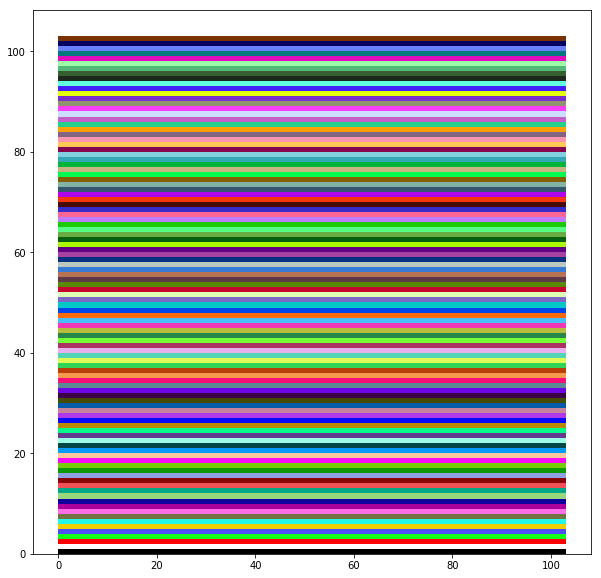

In [111]:
n_colors = 100
colors = [(0,0,0), (1,1,1), (1,0,0)]

for i in range(n_colors):
    colors.append(generate_new_color(colors, pastel_factor=0, metric='rgb'))

plt.figure(figsize=(10,10))    
plt.stackplot([0,len(colors)], [[1,1] for i in range(len(colors))], colors=colors);

In [102]:
import pandas as pd
df = pd.read_csv('../data/forecast/placeholders.csv')
pd.Series([df[col].unique() for col in df.columns])

uniques = [df[col].unique() for col in df.columns]
uniques = [x for y in uniques for x in y]
pd.Series(uniques).drop_duplicates().values

array([23092, 23093, 23094, 24360, 24361, 24677, 24678, 24679, False,
       'Resource Required 1', 'Newcastle 01', 'Edinburgh 01',
       'Birmingham 01', 'SPF RA 01', 'Resource required 2',
       'Resource required 3', 'Leeds 01', '[]',
       '2019-04-10T09:49:32.000Z', '2019-04-10T09:53:49.000Z',
       '2019-03-05T09:25:29.000Z', '2019-03-12T16:14:24.000Z',
       '2019-03-12T16:24:23.000Z', '2019-03-12T16:26:38.000Z',
       '2019-03-12T15:46:29.000Z', '2019-03-25T15:49:54.000Z', 399979,
       458589], dtype=object)

In [5]:
colors = [(0,0,0), (1,1,1), (1,0,0)]

for i in range(n_colors):
    colors.append(generate_new_color(colors, pastel_factor=0, metric='lab'))

plt.figure(figsize=(10,10))    
plt.stackplot([0,len(colors)], [[1,1] for i in range(len(colors))], colors=colors);

KeyboardInterrupt: 

In [45]:
import DataHandlers
import pandas as pd

fc = DataHandlers.Forecast()
df = fc.spreadsheet_sheet('project',
                           pd.datetime(2019, 3, 1),
                           pd.datetime(2020, 4, 1),
                           'MS')


In [93]:
html = """<tbody>
"""

for group_label, group_content in df.groupby(level=0):
    n_rows = len(group_content)
    
    html += """<tr>
    <th class="index" rowspan={n_rows}>{group_label}</th>
    """.format(n_rows=n_rows, group_label=group_label)

    
    for i in range(n_rows):
        row_label = group_content.iloc[i].name[1]
        html += """<th>{row_label}</th>
        """.format(row_label=row_label)
        
        row_content = group_content.iloc[i].values
        for cell in row_content:
            name = cell[:-9].replace(' ', '_')
            if name.strip()=='':
                html += """<td class="blank"></td>
                """
            else:
                html += """<td class="{name}" >{cell}</td>
                """.format(name=name, cell=cell)

        html += """</tr> """
        
    html += """<tr class="separator">
    </tr> """ 

print(html)

<tbody>
<tr>
    <th class="index" rowspan=2>AI for City Planning</th>
    <th>1</th>
        <td class="May_Yong" >May Yong<br>(0.5)</td>
                <td class="May_Yong" >May Yong<br>(0.5)</td>
                <td class="May_Yong" >May Yong<br>(0.5)</td>
                <td class="blank"></td>
                <td class="blank"></td>
                <td class="blank"></td>
                <td class="blank"></td>
                <td class="blank"></td>
                <td class="blank"></td>
                <td class="blank"></td>
                <td class="blank"></td>
                <td class="blank"></td>
                <td class="blank"></td>
                <td class="blank"></td>
                </tr> <th>2</th>
        <td class="Louise_Bowler" >Louise Bowler<br>(0.5)</td>
                <td class="Louise_Bowler" >Louise Bowler<br>(0.5)</td>
                <td class="Louise_Bowler" >Louise Bowler<br>(0.5)</td>
                <td class="blank"></td>
                <td c

In [83]:
tmp='Newcastle 01<br>(0.5)'
tmp[:-9]

'Newcastle 01'

In [2]:
import DataHandlers
import pandas as pd

fc = DataHandlers.Forecast()

df = fc.spreadsheet_sheet('person',
                          pd.datetime(2019, 3, 1),
                          pd.datetime(2020, 4, 1),
                          'MS')

In [16]:
import re

tmp = df['Apr-2019']

def extract_name(text):
    """strip allocation of format (x.x) and html <br> tags from name"""
    name = re.sub(r'<br>', '', text)
    name = re.sub(r'\(\d\.\d\)', '', name)
    return name

tmp = tmp.apply(extract_name)

In [19]:
tmp.unique().drop('Resource Required')

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

(0.0, 6.0, 6.0, 0.0)

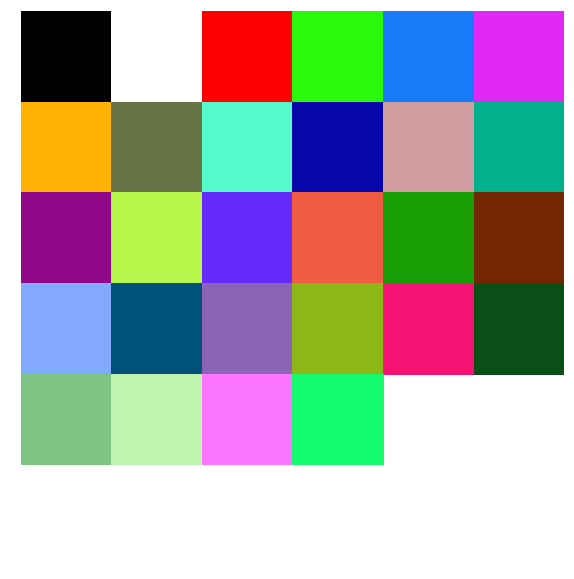

In [120]:
import HTMLWriter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import numpy as np
%matplotlib inline

colors = [(0,0,0), (1,1,1), (1,0,0)]
for i in range(25):
    colors.append(HTMLWriter.generate_new_color(colors, pastel_factor=0))


n_grid = math.ceil(np.sqrt(len(colors)))

width=1
height=1

x=0
y=0

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')

for idx, color in enumerate(colors):
    ax.add_patch(patches.Rectangle((x, y), width, height, color=color))
            
    if (idx+1)%n_grid==0:
        y+=height
        x=0
    else:
        x+=width

plt.ylim([0, n_grid*height])
plt.xlim([0, n_grid*width])
ax.invert_yaxis()
plt.axis('off')

In [123]:
np.reshape(colors,[n_grid,n_grid,3])

ValueError: cannot reshape array of size 84 into shape (6,6,3)

In [129]:
colors

[(0, 0, 0),
 (1, 1, 1),
 (1, 0, 0),
 [0.1619742741438438, 0.9761217805865143, 0.0524197731600462],
 [0.08760110645852126, 0.47944220602399334, 0.9765484351935126],
 [0.8803680502331201, 0.16218092239478787, 0.9615019149613198],
 [0.9983147734565954, 0.6969418779281632, 0.013670864195128751],
 [0.40557946805708156, 0.4476335009681215, 0.2801496686482634],
 [0.32925698322342944, 0.983352968848105, 0.7914279460320516],
 [0.025500615508307845, 0.024979238642926505, 0.669230841640797],
 [0.8257780964808142, 0.6196483422010778, 0.6349246690687537],
 [0.00032902757552877304, 0.6958549154397922, 0.5491968021797982],
 [0.5677921096612137, 0.03412560196276937, 0.5362081554019766],
 [0.718957935216937, 0.9675992318785327, 0.2966835099934747],
 [0.3953852406731313, 0.17058593909779596, 0.9829336579841039],
 [0.9399611028443962, 0.35605157263710263, 0.2642726929748652],
 [0.09276033292675978, 0.6167966330772761, 0.019812120506716435],
 [0.4490907904224939, 0.1479549890487022, 0.007566571608186412],